## The Analysis of The Evolution of The Russian Comedy. Stage Directions Features

In this analysis, we will explore the data we extracted for the Russian comedies. In this section, we will focus on three features that were previously introduced by Sperantov in his analysis of the evolution of the Russian tragedy, including:
- stage directions frequency
- the average length of a stage direction
- the degree of verse and prose interaction

We will examine the following questions:
1. We will explore feature correlations.
2. We will check the features for normality using the Shapiro-Wilk normality test. This will help us determine whether parametric vs. non-parametric statistical tests are more appropriate. If the features are not normally distributed, we will use non-parametric tests. Otherwise, parametric will be used.
2. We will run statistical tests to determine whether we could ditinguish two periods of the Russian five-act comedy:
 - Period One (from 1775 to 1794)
 - Period Two (from 1795 to 1849).

The choice of the 1795 border line is motivated by updated Sperantov's periodization of the five-act tragedy.
3. We will create visualizations for each feature.
4. We will run descriptive statistics.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
def make_plot(feature, title):
    mean, std, median = summary(feature)
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=17)
    sns.distplot(feature, kde=False)
    mean_line = plt.axvline(mean, 
                            color='black',
                            linestyle='solid', 
                            linewidth=2); M1 = 'Mean';
    median_line = plt.axvline(median, 
                               color='green',linestyle='dashdot', 
                               linewidth=2); M2='Median'
    std_line = plt.axvline(mean + std, 
                           color='black',
                           linestyle='dashed', 
                           linewidth=2); M3 = 'Standard deviation';
    plt.axvline(mean - std, 
                color='black',
                linestyle='dashed', 
                linewidth=2)

    plt.legend([mean_line, median_line, std_line], [M1, M2, M3])
    plt.show()

In [3]:
def summary(feature):
    mean = feature.mean()
    std = feature.std()
    median = feature.median()
    
    return mean, std, median

In [4]:
# updated boundaries
def determine_period(row):
    if row <= 1794:
        period = 1
    else:
        period = 2
    
    return period

In [5]:
comedies = pd.read_csv('../Russian_Comedies/Data/Comedies_Raw_Data.csv')

In [6]:
# sort by creation date
comedies_sorted = comedies.sort_values(by='creation_date').copy()

In [7]:
# select only original comedies and five act
original_comedies = comedies_sorted[(comedies_sorted['translation/adaptation'] == 0) & 
                                   (comedies_sorted['num_acts'] == 5)].copy()

In [8]:
original_comedies.head()

,index,title,first_name,last_name,creation_date,translation/adaptation,num_acts,free_iambs,num_present_characters,num_scenes_text,...,percentage_open_scenes,percentage_scenes_rhymes_split_verse,num_stage_directions,stage_directions_frequency,num_word_tokens_in_stage_directions,average_length_of_stage_direction,num_verse_splitting_stage_directions,degree_of_verse_prose_interaction,number_scenes_with_discontinuous_change_characters,percentage_scenes_with_discontinuous_change_characters
0,R_1,Samoliubivyi stikhotvorets,Nikolai,Nikolev,1775,0,5,0,8,37,...,65.217,17.391,406,24.458,1102,2.714,161,9.699,3,6.667
1,R_2,Khvastun,Iakov,Kniazhnin,1785,0,5,0,14,50,...,47.273,14.545,356,17.298,893,2.508,104,5.053,2,3.636
3,R_4,Prestupnik ot igry ili bratom prodannaia sestra,Dmitrii,Efim’ev,1788,0,5,0,8,43,...,48.077,11.538,299,22.669,782,2.615,90,6.823,5,9.615
2,R_3,Chudaki,Iakov,Kniazhnin,1790,0,5,0,15,44,...,51.667,6.667,386,16.489,1078,2.793,139,5.938,2,3.333
4,R_5,Smekh i gore,Aleksandr,Klushin,1792,0,5,0,9,56,...,6.667,3.333,255,14.522,771,3.024,64,3.645,4,6.667


In [9]:
original_comedies.shape

(16, 38)

In [10]:
comedies_stage_dir_features = original_comedies[['index', 
                                               'title', 
                                               'first_name', 
                                               'last_name', 
                                               'creation_date',
                                               'stage_directions_frequency',
                                               'average_length_of_stage_direction',
                                               'degree_of_verse_prose_interaction']].copy()

In [11]:
comedies_stage_dir_features['creation_date'].min()

1775

In [12]:
comedies_stage_dir_features.head()

,index,title,first_name,last_name,creation_date,stage_directions_frequency,average_length_of_stage_direction,degree_of_verse_prose_interaction
0,R_1,Samoliubivyi stikhotvorets,Nikolai,Nikolev,1775,24.458,2.714,9.699
1,R_2,Khvastun,Iakov,Kniazhnin,1785,17.298,2.508,5.053
3,R_4,Prestupnik ot igry ili bratom prodannaia sestra,Dmitrii,Efim’ev,1788,22.669,2.615,6.823
2,R_3,Chudaki,Iakov,Kniazhnin,1790,16.489,2.793,5.938
4,R_5,Smekh i gore,Aleksandr,Klushin,1792,14.522,3.024,3.645


## Part 1. Feature Correlations

In [13]:
comedies_stage_dir_features[['stage_directions_frequency',
                           'average_length_of_stage_direction',
                           'degree_of_verse_prose_interaction']].corr().round(2)

,stage_directions_frequency,average_length_of_stage_direction,degree_of_verse_prose_interaction
stage_directions_frequency,1.00,0.04,0.76
average_length_of_stage_direction,0.04,1.00,0.10
degree_of_verse_prose_interaction,0.76,0.10,1.00


In Russian five-act comedies, the degree of verse and prose interaction is strongly correlated with the state directions frequency (the correlation coefficient = 0.76), which was also true for the Russian five-act tragedies.

However, while in the Russian five-act tragedies the average length of a stage direction was mildly correlated with other features, in the case of the Russian five-act comedy, there is only a very weak correlation between the average length of a stage direction with stage directions frequency (the correlation coefficient = 0.04) and degree of verse and prose interaction (the correlation coefficient = 0.1).

## Part 2. Feature Distributions and Normality

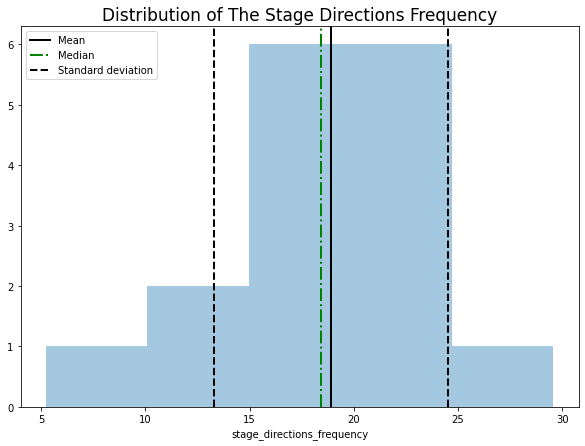

In [14]:
make_plot(comedies_stage_dir_features['stage_directions_frequency'], 
         'Distribution of The Stage Directions Frequency')

### Shapiro-Wilk Normality Test

In [15]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_stage_dir_features['stage_directions_frequency'])[1])

The p-value of the Shapiro-Wilk normality test: 0.490577757358551


The Shapiro-Wilk test showed that the probability of the stage directions frequency of being normally distributed is very high (p-value is 0.490577757358551), which is above the 0.05 significance level. Therefore, we fail to reject the null hypothesis of normality of the distribution of the stage directions frequency.

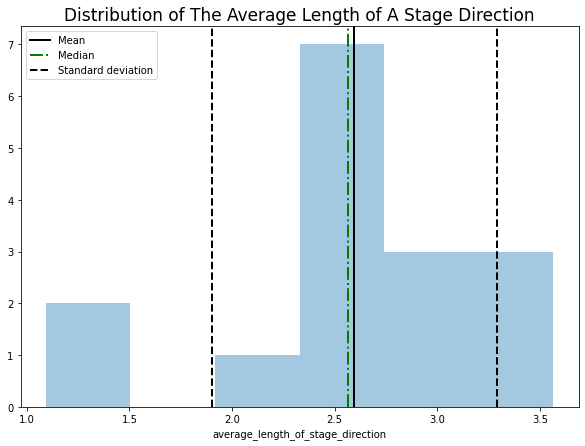

In [16]:
make_plot(comedies_stage_dir_features['average_length_of_stage_direction'], 
        'Distribution of The Average Length of A Stage Direction')

In [17]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_stage_dir_features['average_length_of_stage_direction'])[1])

The p-value of the Shapiro-Wilk normality test: 0.05207343026995659


The Shapiro-Wilk test showed that the p-value of the average length of a stage direction of being normally distributed is 0.05207343026995659, which is above 0.05. Therefore, we fail to reject the null hypothesis of the normal distribution of the average length of a stage direction.

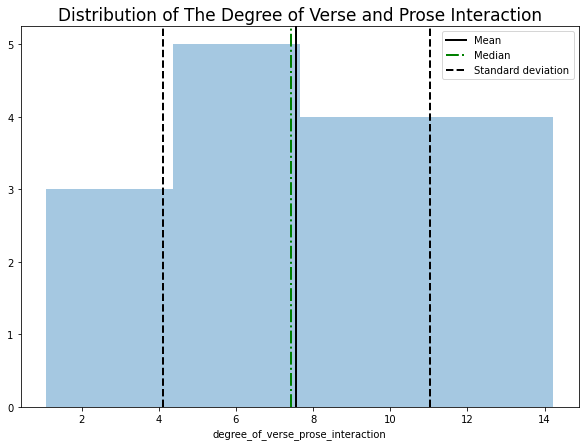

In [18]:
make_plot(comedies_stage_dir_features['degree_of_verse_prose_interaction'], 
        'Distribution of The Degree of Verse and Prose Interaction')

In [19]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_stage_dir_features['degree_of_verse_prose_interaction'])[1])

The p-value of the Shapiro-Wilk normality test: 0.9992695450782776


The Shapiro-Wilk test showed that the p-value of the degree of verse and prose interaction of being normally distributed is extremely high (p-value = 0.9992695450782776). We fail to reject the hypothesis of normal distribution.

### Summary:

All examined features appear normally distributed. Therefore, it will be appropriate to use a parametric statistical tests. In this case, since we have only two potential periods, we will run **t-test** to check if the difference between the two periods is statistically significant.


In [20]:
from scipy.stats import ttest_ind

## Part 3. Hypothesis Testing

We will run statistical tests to determine whether the two periods distinguishable for the Russian five-act verse tragedy are significantly different for the Russian five-act comedy. The two periods are:
 - Period One (from 1775 to 1794)
 - Period Two (from 1795 to 1849)

We will use *scipy.stats* Python library to run **t-test** to check whether there is a difference between Period One and Period Two. The null hypothesis is that there is no difference between the two periods. The alternative hypothesis is that the two periods are different, Our significance level will be set at 0.05. If the p-value produced by the t-test will be below 0.05. We will reject the null hypothesis of no difference. 

One limitation that we need to mention is the sample size. The first period has only six comedies and the second period has only ten. However, it is impossible to increase the sample size - we cannot ask the Russian playwrights of the eighteenth and nineteenth century to produce more five-act verse comedies.

In [21]:
comedies_stage_dir_features['period'] = comedies_stage_dir_features.creation_date.apply(determine_period)

In [22]:
period_one = comedies_stage_dir_features[comedies_stage_dir_features['period'] == 1].copy()
period_two = comedies_stage_dir_features[comedies_stage_dir_features['period'] == 2].copy()

In [23]:
period_one.shape

(6, 9)

In [24]:
period_two.shape

(10, 9)

### Stage Directions Frequency

In [25]:
ttest_ind(period_one['stage_directions_frequency'],
          period_two['stage_directions_frequency'], equal_var=False)

Ttest_indResult(statistic=-0.23679532826080926, pvalue=0.8162582090019411)

### Average Length of A Stage Direction

In [26]:
ttest_ind(period_one['average_length_of_stage_direction'],
          period_two['average_length_of_stage_direction'], equal_var=False)

Ttest_indResult(statistic=1.35475511647528, pvalue=0.1989399481780029)

### The Degree of Verse and Prose Interaction

In [27]:
ttest_ind(period_one['degree_of_verse_prose_interaction'],
          period_two['degree_of_verse_prose_interaction'], equal_var=False)

Ttest_indResult(statistic=-1.5469512426936645, pvalue=0.14437951473614047)

### Summary

|Feature                    |p-value               |Result
|---------------------------| ----------------|--------------------------------
|  Stage directions frequency |0.82 | Not Significant
|Average length of a stage direction|0.20 | Not significant
|  The degree of verse and prose interaction |0.14| Not significant


For comedies, there is no evidence to suggest that there is a difference between Periods One and Two based on either the frequency of stage directions, the average length of a stage direction, or the degree of verse and prose interaction. Out of three examined features, there is the lowest probability (p-value = 0.14) that the degree of verse and prose interaction in Period One and Period Two belong to the same distribution.

## Part 4. Visualizations

In [28]:
def scatter(df, feature, title, xlabel, text_y):
    sns.jointplot('creation_date', 
               feature,
               data=df, 
               color='b', 
               height=7).plot_joint(
               sns.kdeplot, 
               zorder=0, 
               n_levels=20)
    plt.axvline(1795, color='grey',linestyle='dashed', linewidth=2)
    plt.text(1795.5, text_y, '1795')
    plt.title(title, fontsize=20, pad=100)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(xlabel, fontsize=14)

    plt.show()

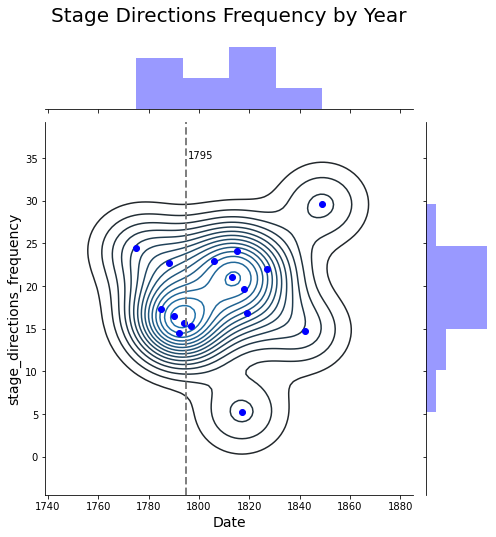

In [29]:
scatter(comedies_stage_dir_features, 
        'stage_directions_frequency', 
        'Stage Directions Frequency by Year', 
        'stage_directions_frequency',
         35)

In [30]:
comedies_stage_dir_features[comedies_stage_dir_features['stage_directions_frequency'] < 10][['title', 
                                                                                             'last_name',
                                                                                              'creation_date',
                                                                                              'stage_directions_frequency']]

,title,last_name,creation_date,stage_directions_frequency
10,Tri zhenikha ili liubov‘ nyneshniago sveta,Soboloev,1817,5.229


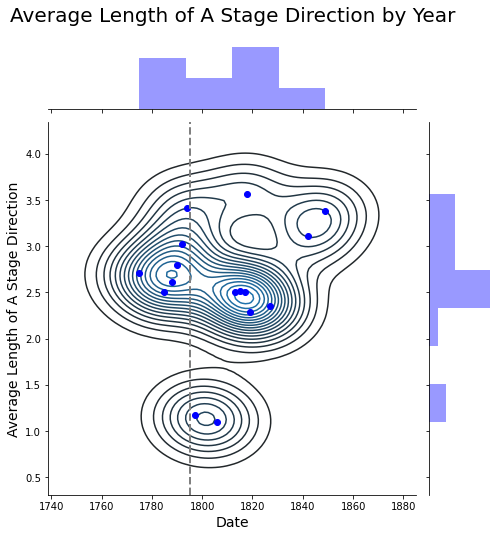

In [31]:
scatter(comedies_stage_dir_features, 
        'average_length_of_stage_direction', 
        'Average Length of A Stage Direction by Year', 
        'Average Length of A Stage Direction',
         4.5)

In [32]:
comedies_stage_dir_features[comedies_stage_dir_features['average_length_of_stage_direction'] < 1.5][['title', 
                                                                                                     'last_name',
                                                                                                      'creation_date',
                                                                                                      'average_length_of_stage_direction']]

,title,last_name,creation_date,average_length_of_stage_direction
6,Novye chudaki ili Prozhekter,Golitsyn,1797,1.168
7,Zhenikhi ili pobezhdennyi predrassudok,Seliavin,1806,1.093


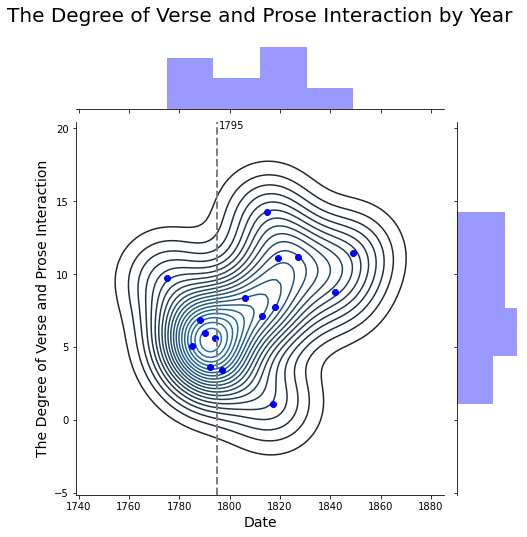

In [33]:
scatter(comedies_stage_dir_features, 
        'degree_of_verse_prose_interaction', 
        'The Degree of Verse and Prose Interaction by Year', 
        'The Degree of Verse and Prose Interaction',
         20)

In [34]:
comedies_stage_dir_features[comedies_stage_dir_features['degree_of_verse_prose_interaction'] < 2][['title', 
                                                                                                   'last_name',
                                                                                                   'creation_date',
                                                                                                    'degree_of_verse_prose_interaction']]

,title,last_name,creation_date,degree_of_verse_prose_interaction
10,Tri zhenikha ili liubov‘ nyneshniago sveta,Soboloev,1817,1.078


## Part 5. Descriptive Statistics For the Corpus and By Periods

Here, we will provide descriptive statistics for the entire corpus of the Russian five-act comedy in verse and well as descriptive statistics for the two periods. We were unable to determine that the two periods are significantly different. However, this could be caused by extremely small sample size. Regardless of this fact, it would be insightful to see how the features developed over time.

### Stage Directions Frequency

#### In Entire Corpus

In [35]:
comedies_stage_dir_features.describe().loc[:, 'stage_directions_frequency'][['mean', 
                                                                            'std', 
                                                                            '50%',
                                                                            'min', 
                                                                            'max']].round(2)

mean    18.91
std      5.63
50%     18.45
min      5.23
max     29.57
Name: stage_directions_frequency, dtype: float64

#### By Tentative Periods

In [36]:
comedies_stage_dir_features.groupby('period').describe().loc[:, 'stage_directions_frequency'][['mean', 
                                                                                            'std', 
                                                                                            '50%',
                                                                                            'min', 
                                                                                            'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,18.51,4.06,16.89,14.52,24.46
2,19.14,6.60,20.33,5.23,29.57


### Average Length of A Stage Direction

#### In Entire Corpus

In [37]:
comedies_stage_dir_features.describe().loc[:, 'average_length_of_stage_direction'][['mean', 
                                                                                    'std', 
                                                                                    '50%',
                                                                                    'min', 
                                                                                    'max']].round(2)

mean    2.60
std     0.69
50%     2.56
min     1.09
max     3.56
Name: average_length_of_stage_direction, dtype: float64

#### By Tentative Periods

In [38]:
comedies_stage_dir_features.groupby('period').describe().loc[:, 'average_length_of_stage_direction'][['mean', 
                                                                                                        'std', 
                                                                                                        '50%',
                                                                                                        'min', 
                                                                                                        'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,2.84,0.33,2.75,2.51,3.41
2,2.45,0.82,2.50,1.09,3.56


### The Degree of Verse and Prose Interaction

#### In Entire Corpus

In [39]:
comedies_stage_dir_features.describe().loc[:, 
                                             'degree_of_verse_prose_interaction'][['mean', 
                                                                            'std', 
                                                                            '50%',
                                                                            'min', 
                                                                            'max']].round(2)

mean     7.57
std      3.46
50%      7.44
min      1.08
max     14.22
Name: degree_of_verse_prose_interaction, dtype: float64

#### By Tentative Periods

In [40]:
comedies_stage_dir_features.groupby('period').describe().loc[:, 
                                                             'degree_of_verse_prose_interaction'][['mean', 
                                                                                            'std', 
                                                                                            '50%',
                                                                                            'min', 
                                                                                            'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,6.12,2.04,5.76,3.64,9.70
2,8.44,3.93,8.56,1.08,14.22


### Summary:
1. The mean stage directions frequency in the Russian five-act comedy in verse was 18.91. The standard deviation of the stage directions frequency was 5.63. Overall, stage directions frequency increased over time: from 18.51 in tentative Period One to 19.14 in Tentative Period Two. The standard deviation also increased: from 4.06 to 6.60.
2. The mean value of the average length of a stage direction for the entire corpus of the Russian five-act comedy was 2.60. The standard deviation was 0.69. The average length of a stage direction decreased over time: from 2.84 in tentative Period One to 2.45 in tentative Period Two. The standard deviation, however, has increased, from 0.33 to 0.82. 
3. The mean degree of verse and prose interaction was 7.57. The standard deviation was 3.46. Over time, the degree of verse and prose interaction increased from 6.12 in tentative Period One to 8.44 in tentative Period Two. The standard deviation almost doubled from 2.04 to 3.93.

## Conclusions:
1. There was no statistically significant differences between the Russian five-act comedies of two periods Period One (from 1775 to 1794) and Period Two (from 1795 to 1849). This could be in part explained by a small sample size: Period One has only 6 and Period Two has only 10 comedies. This, however, reflects historical reality and cannot be improved.
2. The number of stage directions frequency, the average length of a stage direction, and the degree of verse and prose interaction have increased over time. Their varinace has also increased.